In [1]:
from qiskit import QuantumCircuit, transpile
# from qiskit.providers.aer import QasmSimulator
# from qiskit.providers.basicaer import QasmSimulatorPy
from qiskit_aer import AerSimulator
from qiskit.providers.fake_provider import FakeManila, FakeToronto, FakeJakartaV2
from qiskit.circuit import Parameter
from qiskit.circuit.library import PauliEvolutionGate
from qiskit.synthesis import QDrift, LieTrotter, SuzukiTrotter

import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sklearn.preprocessing as skp
from scipy.signal import savgol_filter
import os
import sys
from datetime import date
import pathlib
import inspect
import time
import glob

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

module_path = os.path.abspath(os.path.join('..')) # qrc_surrogate
sys.path.append(module_path)
fig_path = f'{module_path}/figs'


from src.feedforward import QExtremeLearningMachine, CPolynomialFeedforward
from src.rewinding import QRewindingRC, QRewindingStatevectorRC
from src.data import DataSource

nrmse_train:    2.70e-03
nrmse_val:      1.04e-02
corr_train:     9.94e-01
corr_val:       9.05e-01


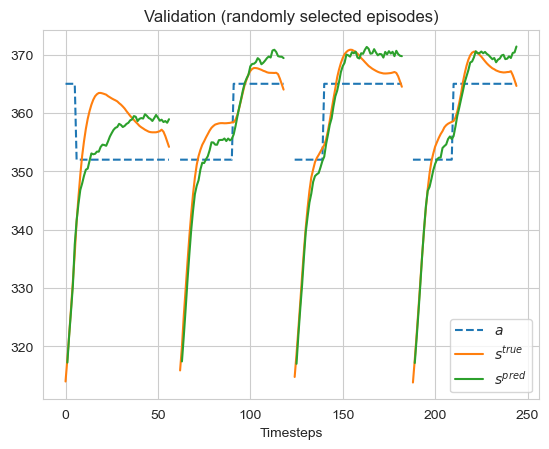

In [2]:
# Restarting works well on the reactor

data = DataSource(xtype='reactor', ytype='reactor', xnorm='norm', ynorm='norm', rseed_data=9369)

rnn = QRewindingStatevectorRC(restarting=False, lookback=10)
rnn.run(data)

rnn.print_results()
fig = rnn.plot_val(nepisodes=4)

nrmse_train:    3.46e-03
nrmse_val:      1.38e-02
corr_train:     9.90e-01
corr_val:       8.45e-01


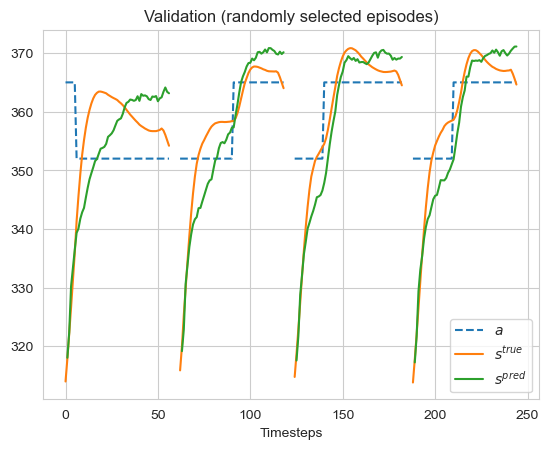

In [3]:
# Restarting works well on the reactor

data = DataSource(xtype='reactor', ytype='reactor', xnorm='norm', ynorm='norm', rseed_data=9369)

rnn = QRewindingStatevectorRC()
rnn.run(data)

rnn.print_results()
fig = rnn.plot_val(nepisodes=4)

# Rewinding

Repeat the past few steps to get memory.
Partly measure the circuit at each repeated step for markovianity. 
Fully measure the circuit at the end. 

Since partial measurements are slow in Qiskit, we use a statevector simulation.

nrmse_train:    1.81e-03
nrmse_val:      7.45e-03
corr_train:     9.97e-01
corr_val:       9.51e-01


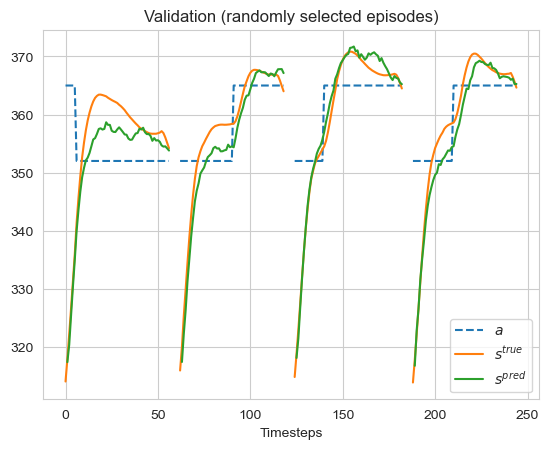

In [4]:
# Restarting works well on the reactor

data = DataSource(xtype='reactor', ytype='reactor', xnorm='norm', ynorm='norm', rseed_data=9369)

rnn = QRewindingStatevectorRC(
    reset_instead_meas=False, nmeas=2, nqubits=5, measaxes=3,
    resetm=True, restarting=True, qctype='ising', rseed=9369,
)
rnn.run(data)

rnn.print_results()
fig = rnn.plot_val(nepisodes=4)

nrmse_train:    2.55e-01
nrmse_val:      2.62e-01
corr_train:     4.24e-01
corr_val:       3.64e-01


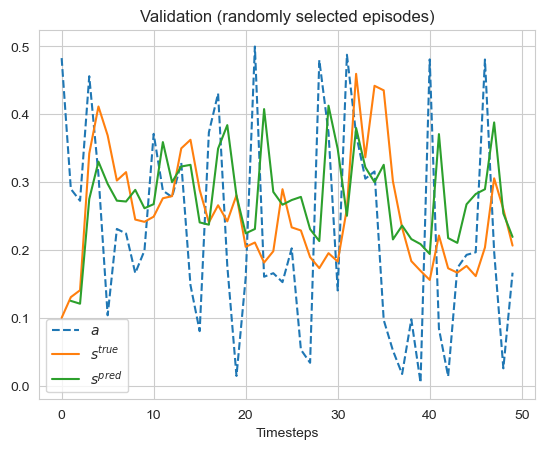

In [5]:
# Restarting also works well with NARMA
# Here we only input x(t) (and not y(t) as well) into the circuit
# to show that we can
# by setting add_y_to_input=False.
# Including y(t) as well improves the results,
# because NARMA is a function of both x(t) and y(t)

data = DataSource(xtype='random_narma', ytype='narma', xnorm='norm', ynorm='norm', memory=3, rseed_data=9369, steps=50)

rnn = QRewindingStatevectorRC(
    reset_instead_meas=False, nmeas=2, nqubits=5,
    resetm=True, restarting=True, qctype='ising', rseed=9369,
    add_y_to_input=False,
)
rnn.run(data)

rnn.print_results()
fig = rnn.plot_val(nepisodes=1)

nrmse_train:    2.06e-01
nrmse_val:      2.09e-01
corr_train:     6.24e-01
corr_val:       5.95e-01


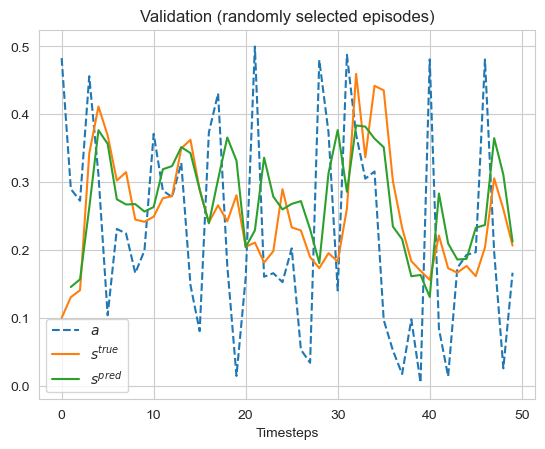

In [6]:
# Including y(t) as well improves the results, 
# because NARMA is a function of both x(t) and y(t)

data = DataSource(xtype='random_narma', ytype='narma', xnorm='norm', ynorm='norm', memory=3, rseed_data=9369, steps=50)

rnn = QRewindingStatevectorRC(
    reset_instead_meas=False, nmeas=2, nqubits=5,
    resetm=True, restarting=True, qctype='ising', rseed=9369,
)
rnn.run(data)

rnn.print_results()
fig = rnn.plot_val(nepisodes=1)